In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
# input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
input_str = clean_text_for_pattern_letter(template_str, out_len=500)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
500
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [25]:
def divide_via_trace(inputs: list, decrease_rate: float = 0.1):
    K: dict[str, int] = {}
    T = []
    
    for inp_idx, inp in enumerate(inputs):
        # decrease
        for symbol, stats in K.items():
            # K[symbol] -= stats * decrease_rate
            # if stats > 0:
            #     K[symbol] -= 1 / (stats * decrease_rate)
            # else:
            #     K[symbol] = 0
            K[symbol] -= pow(decrease_rate, stats)

            if K[symbol] < 0:
                K[symbol] = 0

        # increase
        K.setdefault(inp, 0)
        K[inp] += pow(decrease_rate, K[inp])
        # K[inp] += 1

        # get sum
        S = []
        for symbol, stats in K.items():
            S.append(stats)
        
        S = np.array(S, dtype='float')
        
        # t = np.mean(S)
        t = np.sum(S)
        T.append(t)
    
    return T


In [26]:
def plot_T(T:list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)

    plt.show()

In [27]:
def plot_T_with_symbols(T:list, inputs: list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)
    axs.xaxis.set_ticks(np.arange(len(inputs)), inputs)
    axs.xaxis.grid(True)

    plt.show()

0.1


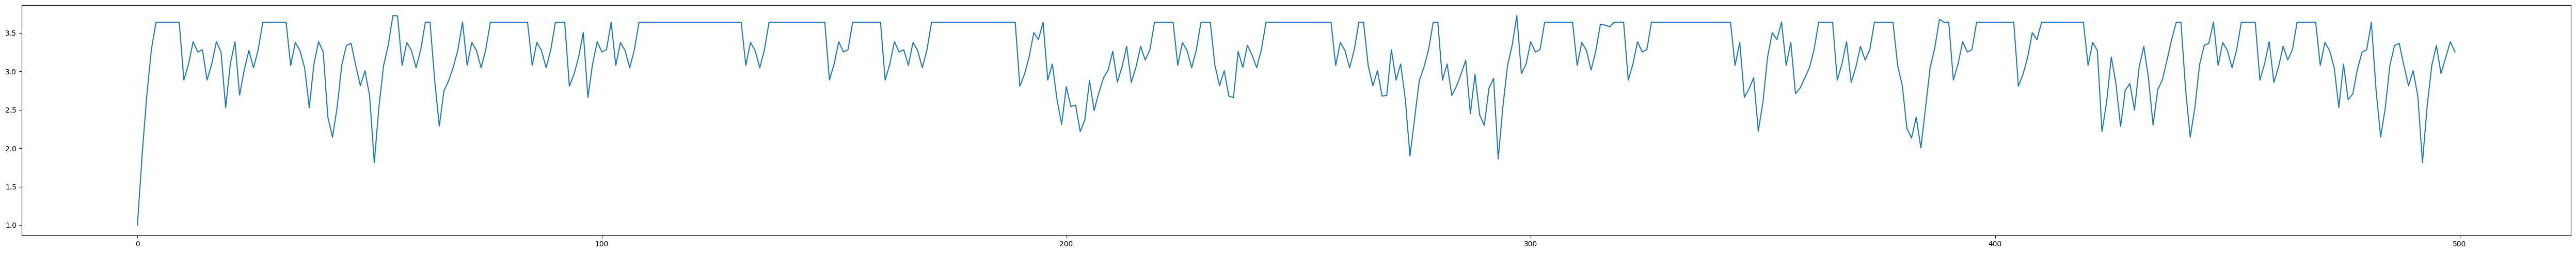

0.2


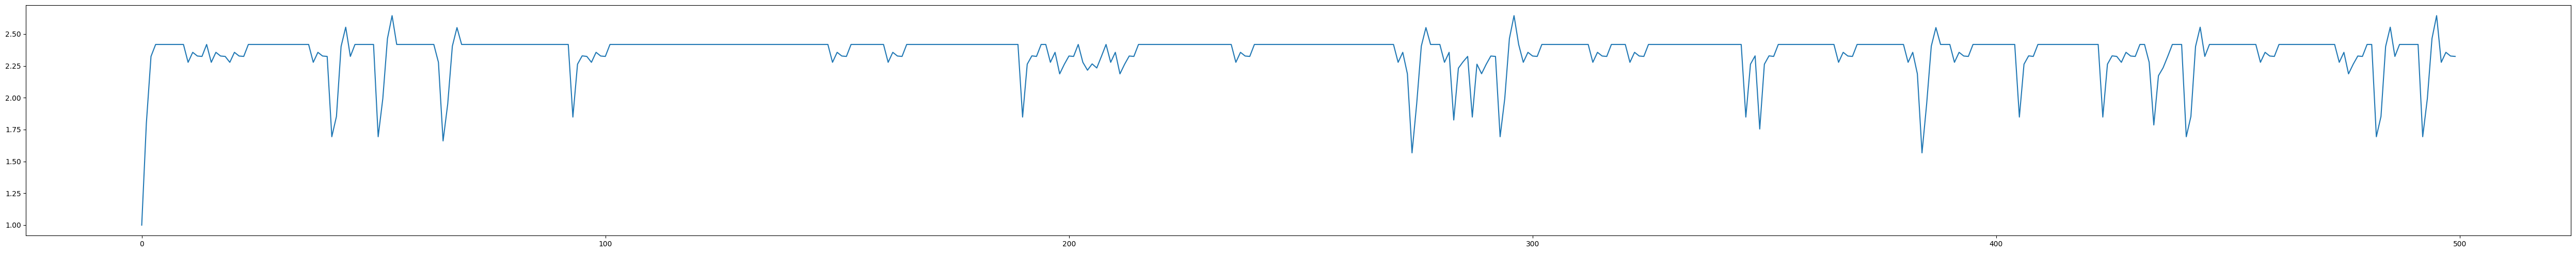

0.30000000000000004


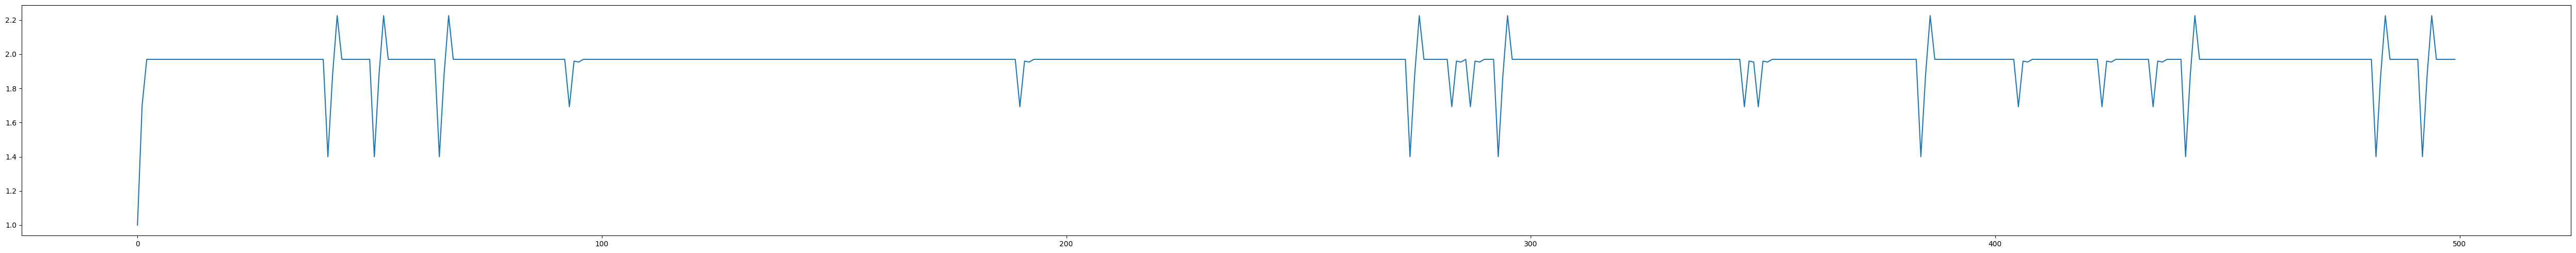

0.4


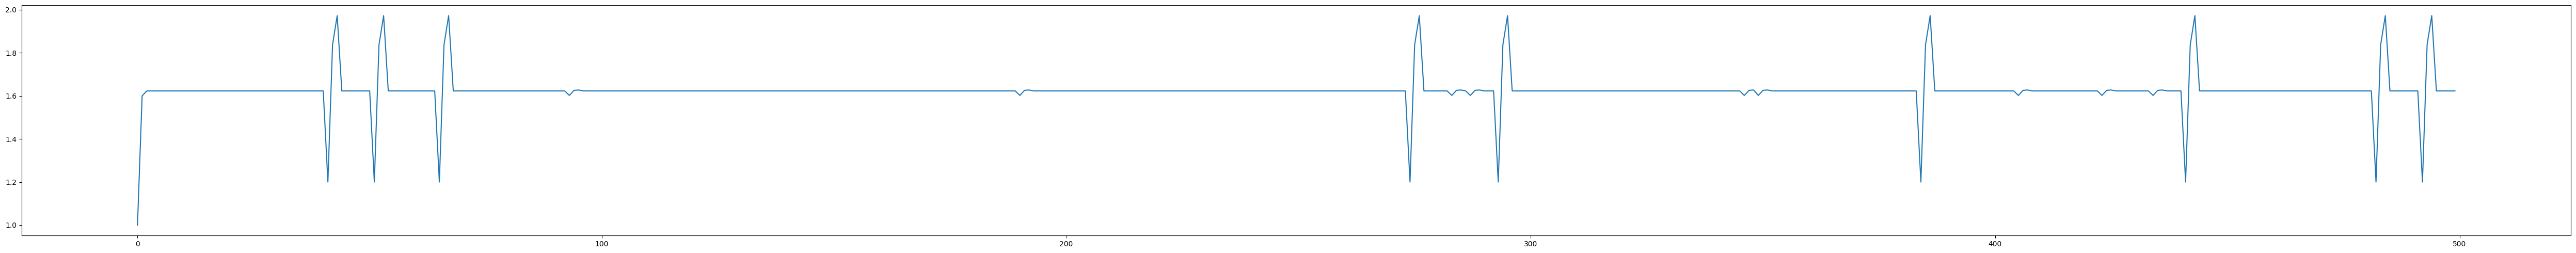

0.5


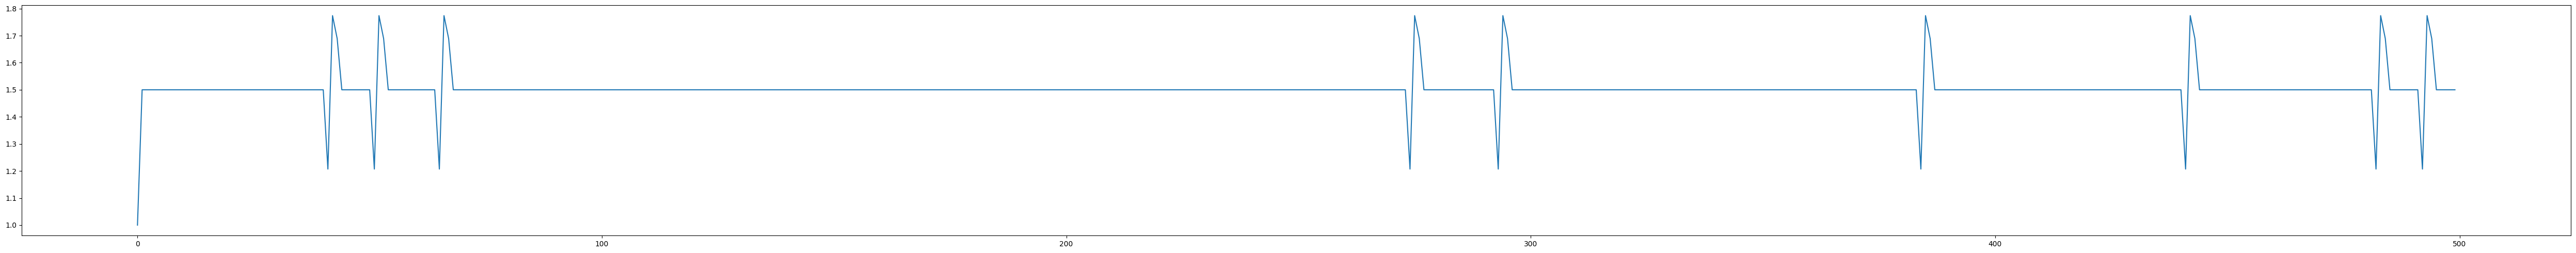

0.6000000000000001


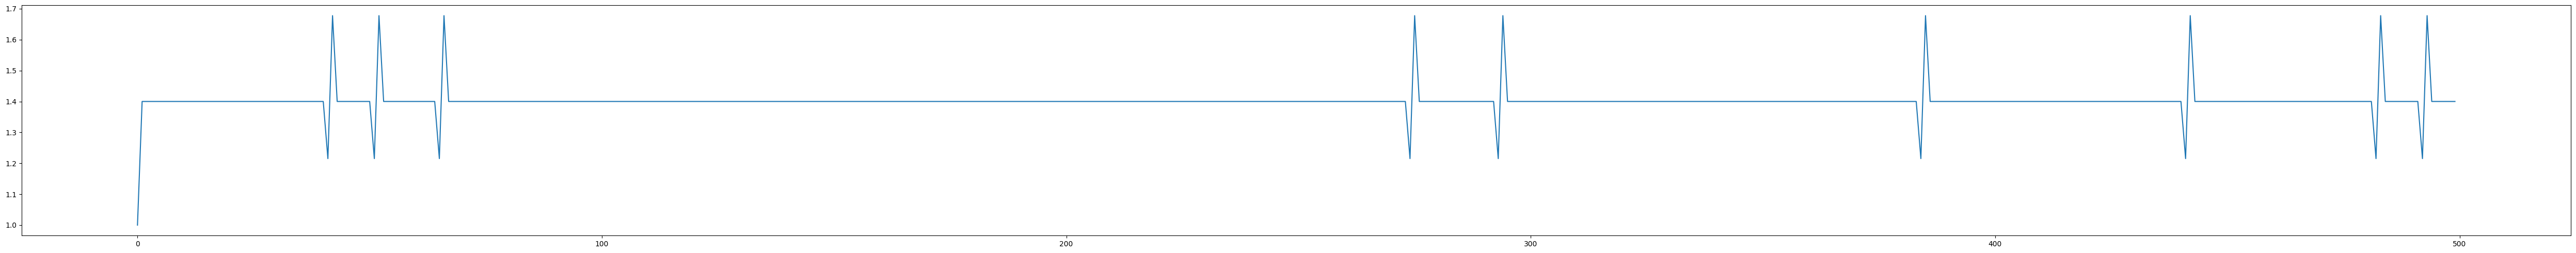

0.7000000000000001


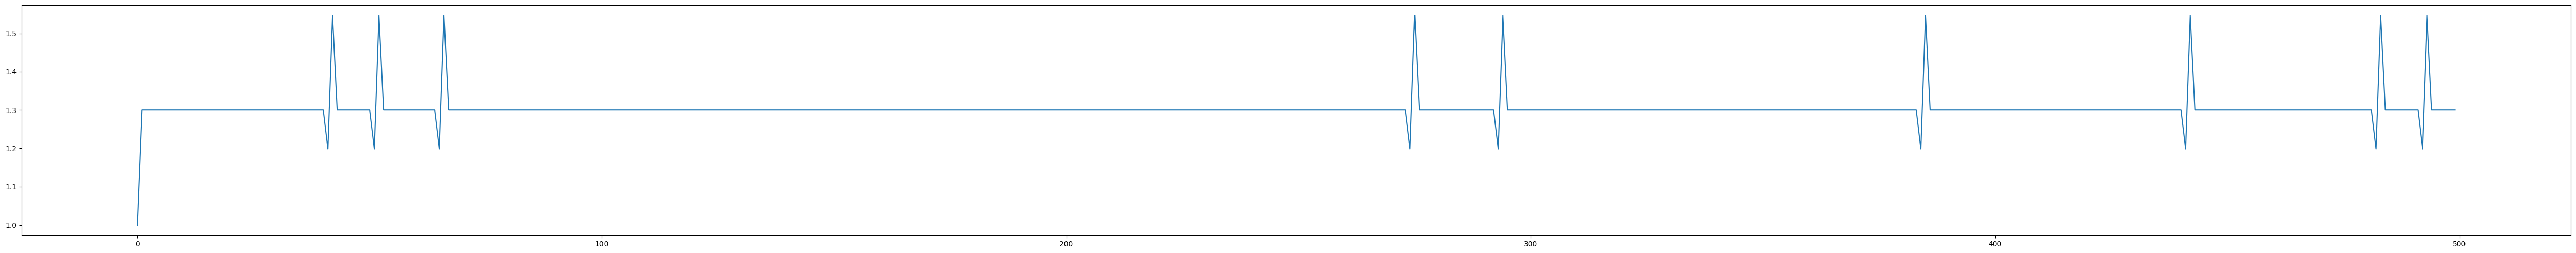

0.8


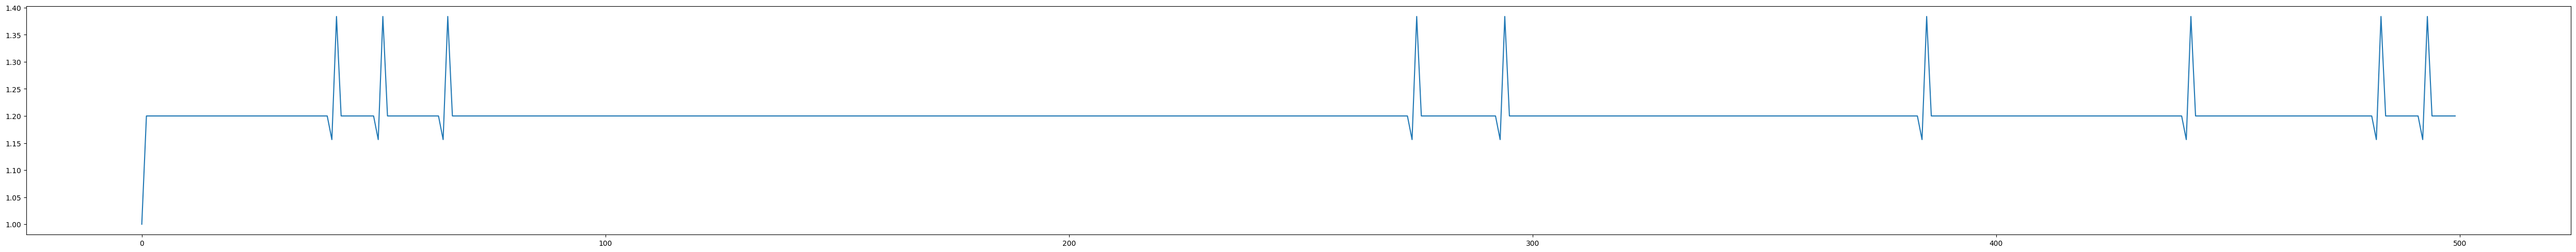

0.9


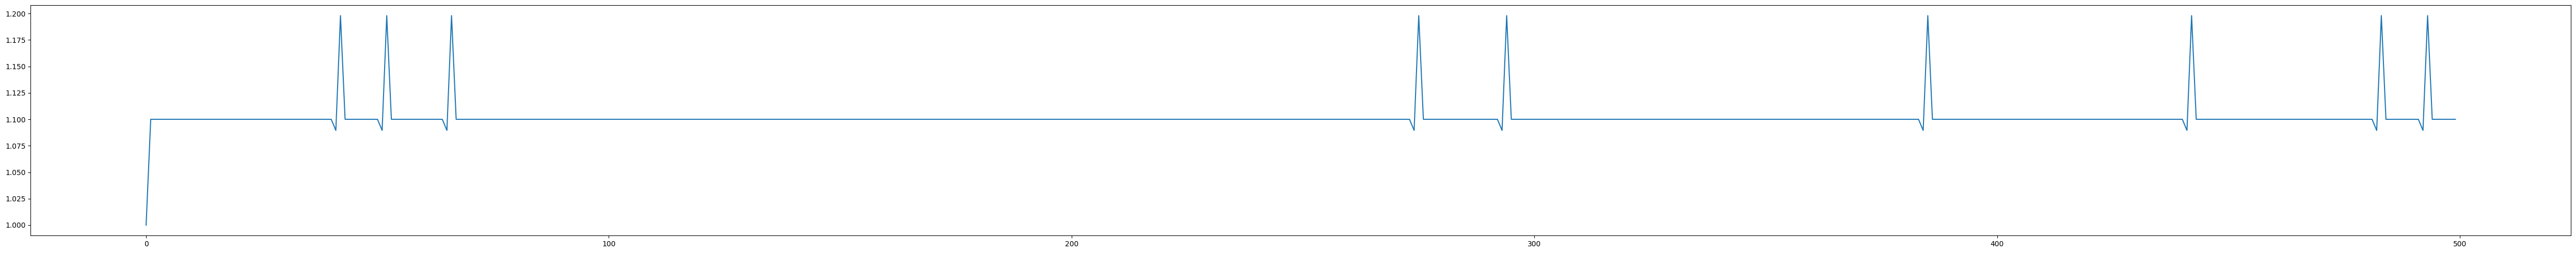

In [28]:
for dr in range(1, 10):
    decrease_rate = dr * 0.1
    print(decrease_rate)
    T = divide_via_trace(inputs=input_str, decrease_rate=decrease_rate)
    plot_T(T)

In [29]:
T = divide_via_trace(inputs=input_str, decrease_rate=0.5)

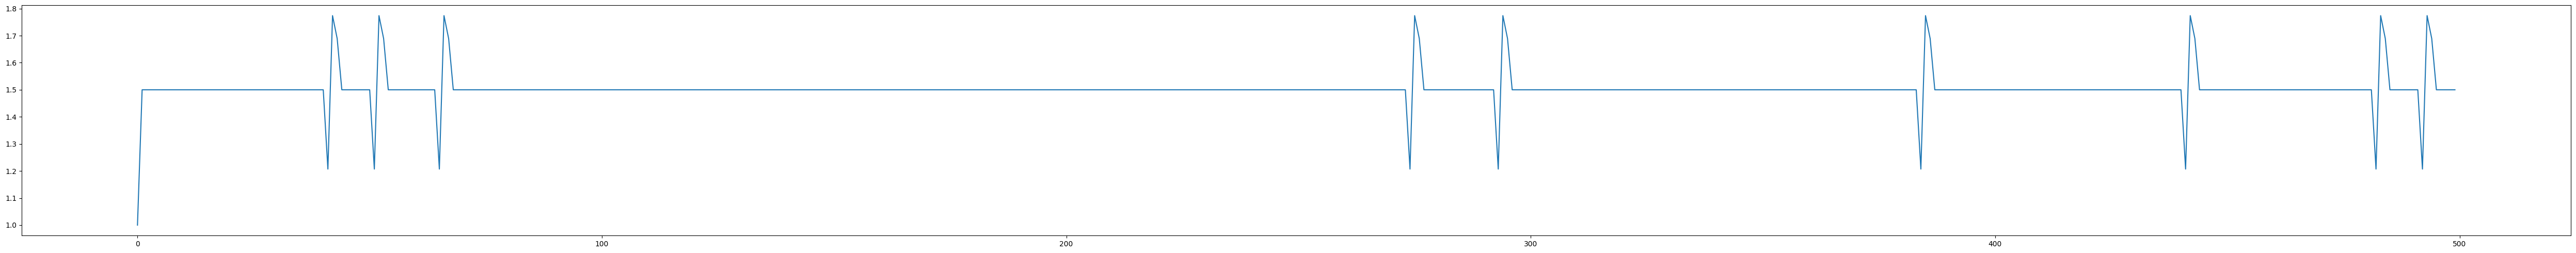

In [30]:
plot_T(T)